<a href="https://colab.research.google.com/github/zakyzaidan/Tugas_MachineLearning/blob/main/Project_Based_Assignment_CLO_2_ANN_Kel_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Bonifasius Tarigan - 1301213235
2. Daniel Pratama Manurung - 1301213281
3. Zaky Zaidan - 1301213354

#### Latar Belakang

PENJELASAN DATASET

Dataset "Real Estate Valuation" ini adalah sebuah dataset yang digunakan untuk masalah regresi. Dataset ini berisi data historis pasar berdasarkan hasil evaluasi real estat yang dikumpulkan dari Sindian Dist., New Taipei City, Taiwan. Dataset ini tidak memiliki missing value dan memiliki karakteristik multivariat dan cocok digunakan untuk analisis regression task.

Berikut adalah detail lebih lanjut mengenai dataset ini:
a. Tipe Data: Dataset ini berisi data tipe Integer dan Real.
b. Jumlah Sampel: Terdapat 414 sampel dalam dataset ini.
c. Fitur: Dataset ini memiliki beberapa fitur yang diinput, yaitu:
X1: tanggal transaksi (misalnya, 2013.250= Maret 2013, 2013.500= Juni 2013, dll.)
  - X2: usia rumah (dalam tahun)
  - X3: jarak ke stasiun MRT terdekat (dalam meter)
  - X4: jumlah toko serba ada dalam lingkaran tempat tinggal yang dapat dicapai dengan berjalan kaki
  - X5: koordinat geografis, lintang (dalam derajat)
  - X6: koordinat geografis, bujur (dalam derajat)
  
d. Target: Output dari dataset ini adalah harga rumah per unit area (10000 New Taiwan Dollar/Ping, dimana Ping adalah unit lokal, 1 Ping = 3.3 meter persegi).

#### **Data Pre-Processing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget http://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip -O real_estate.zip

import zipfile
with zipfile.ZipFile('real_estate.zip', 'r') as zip_ref:
    zip_ref.extractall('real_estate')

--2023-11-22 11:40:49--  http://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘real_estate.zip’

real_estate.zip         [ <=>                ]  32.11K  --.-KB/s    in 0.05s   

2023-11-22 11:40:49 (592 KB/s) - ‘real_estate.zip’ saved [32885]



In [ ]:
# Membaca file xlsx
data_xlsx = pd.read_excel('real_estate/Real estate valuation data set.xlsx')

# Mengubah DataFrame ke csv
data_xlsx.to_csv('real_estate/Real_estate_valuation_data_set.csv', index=False)

In [ ]:
data = pd.read_csv('real_estate/Real_estate_valuation_data_set.csv')

In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data.drop(['No'], axis=1, inplace=True)
columns_rename={
        "X1 transaction date": "Transaction_Date",
        "X2 house age": "House_Age",
        "X3 distance to the nearest MRT station": "Distance_to_MRT",
        "X4 number of convenience stores": "Convenience_Store",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Price",
}
data.rename(columns=columns_rename, inplace=True)

In [ ]:
data.head()

,Transaction_Date,House_Age,Distance_to_MRT,Convenience_Store,Latitude,Longitude,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Date   414 non-null    float64
 1   House_Age          414 non-null    float64
 2   Distance_to_MRT    414 non-null    float64
 3   Convenience_Store  414 non-null    int64  
 4   Latitude           414 non-null    float64
 5   Longitude          414 non-null    float64
 6   Price              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
# cek data null
data.isnull().sum(axis=0).sort_values(ascending=False)

Transaction_Date     0
House_Age            0
Distance_to_MRT      0
Convenience_Store    0
Latitude             0
Longitude            0
Price                0
dtype: int64

In [ ]:
data.shape

(414, 7)

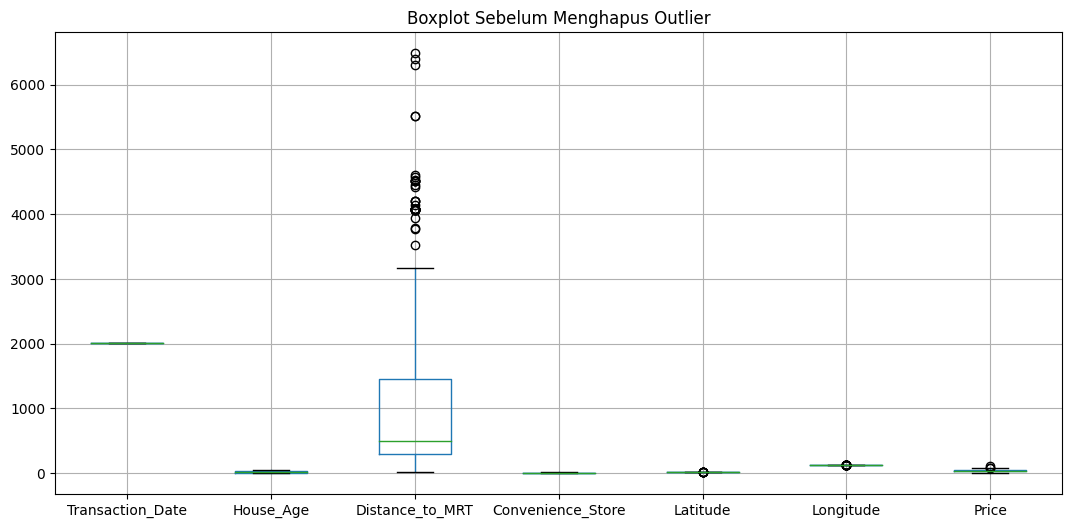

In [ ]:
# Menampilkan boxplot sebelum menghapus outlier
plt.figure(figsize=(13, 6))
data.boxplot()
plt.title('Boxplot Sebelum Menghapus Outlier')
plt.show()

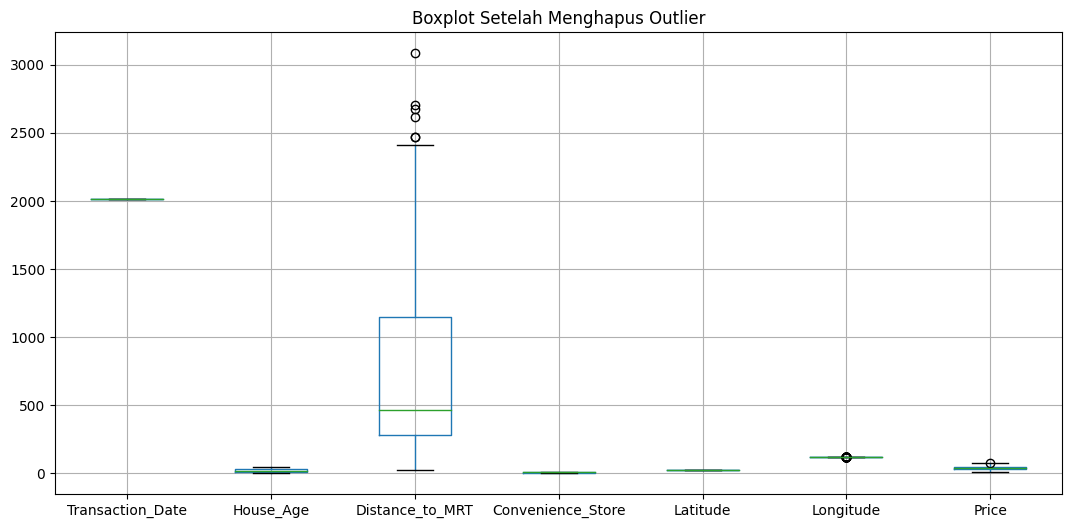

In [ ]:
from pandas.core.frame import DataFrame
# Mengidentifikasi outlier dengan metode IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menampilkan boxplot setelah menghapus outlier
plt.figure(figsize=(13, 6))
data.boxplot()
plt.title('Boxplot Setelah Menghapus Outlier')
plt.show()

In [ ]:
data.shape

(371, 7)

#### **Eksploration Data Analysis (EDA)**

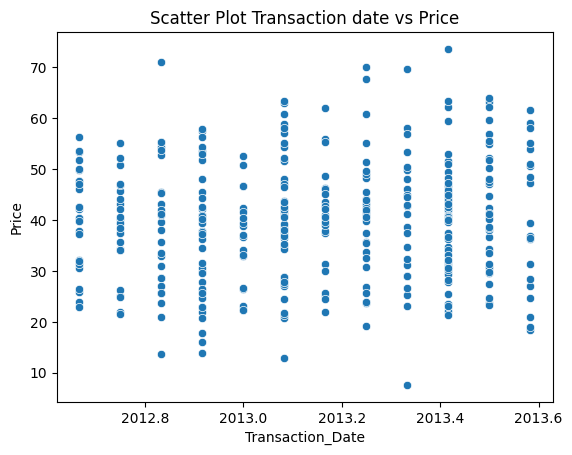

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Transaction_Date", y="Price", data=data)
plt.title("Scatter Plot Transaction date vs Price")
plt.show()

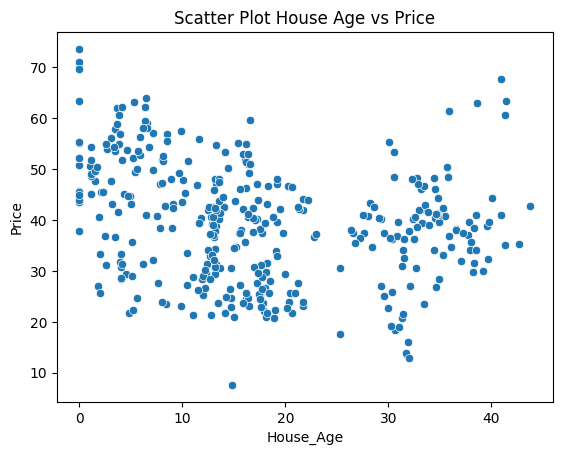

In [ ]:
sns.scatterplot(x="House_Age", y="Price", data=data)
plt.title("Scatter Plot House Age vs Price")
plt.show()

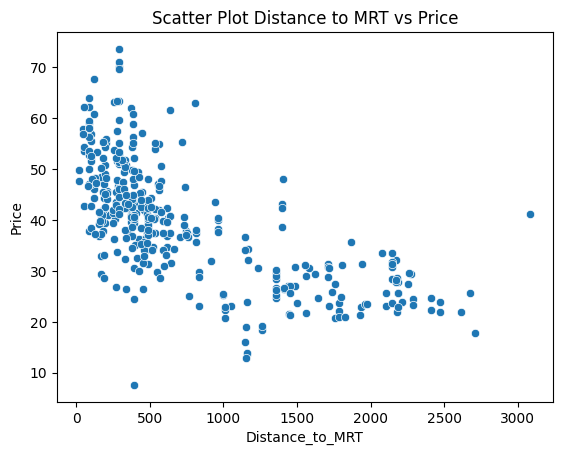

In [ ]:
sns.scatterplot(x="Distance_to_MRT", y="Price", data=data)
plt.title("Scatter Plot Distance to MRT vs Price")
plt.show()

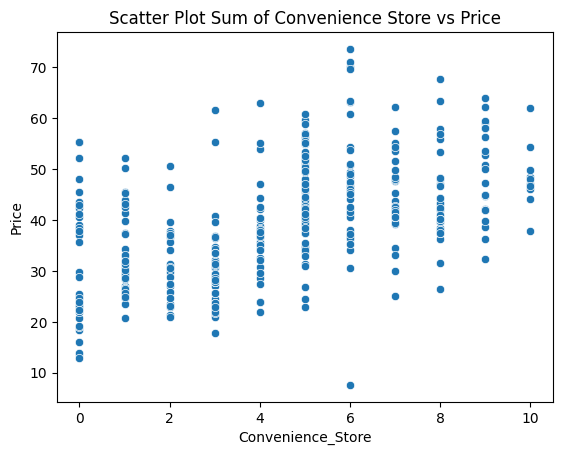

In [ ]:
sns.scatterplot(x="Convenience_Store", y="Price", data=data)
plt.title("Scatter Plot Sum of Convenience Store vs Price")
plt.show()

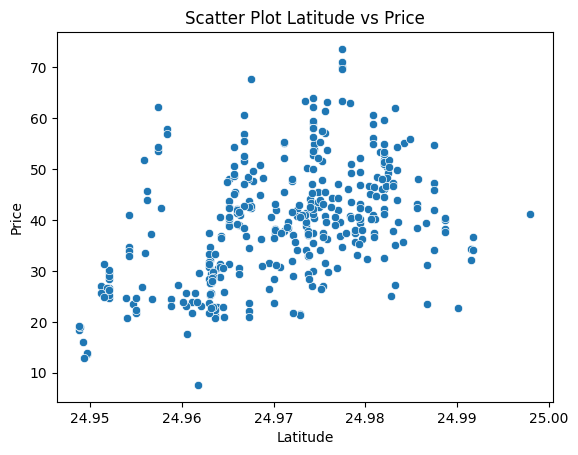

In [ ]:
sns.scatterplot(x="Latitude", y="Price", data=data)
plt.title("Scatter Plot Latitude vs Price")
plt.show()

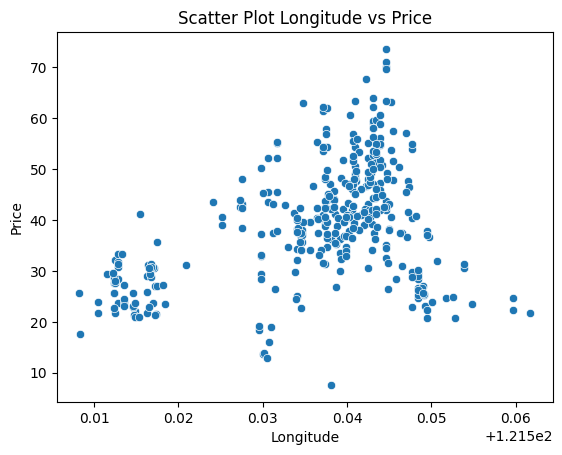

In [ ]:
sns.scatterplot(x="Longitude", y="Price", data=data)
plt.title("Scatter Plot Longitude vs Price")
plt.show()

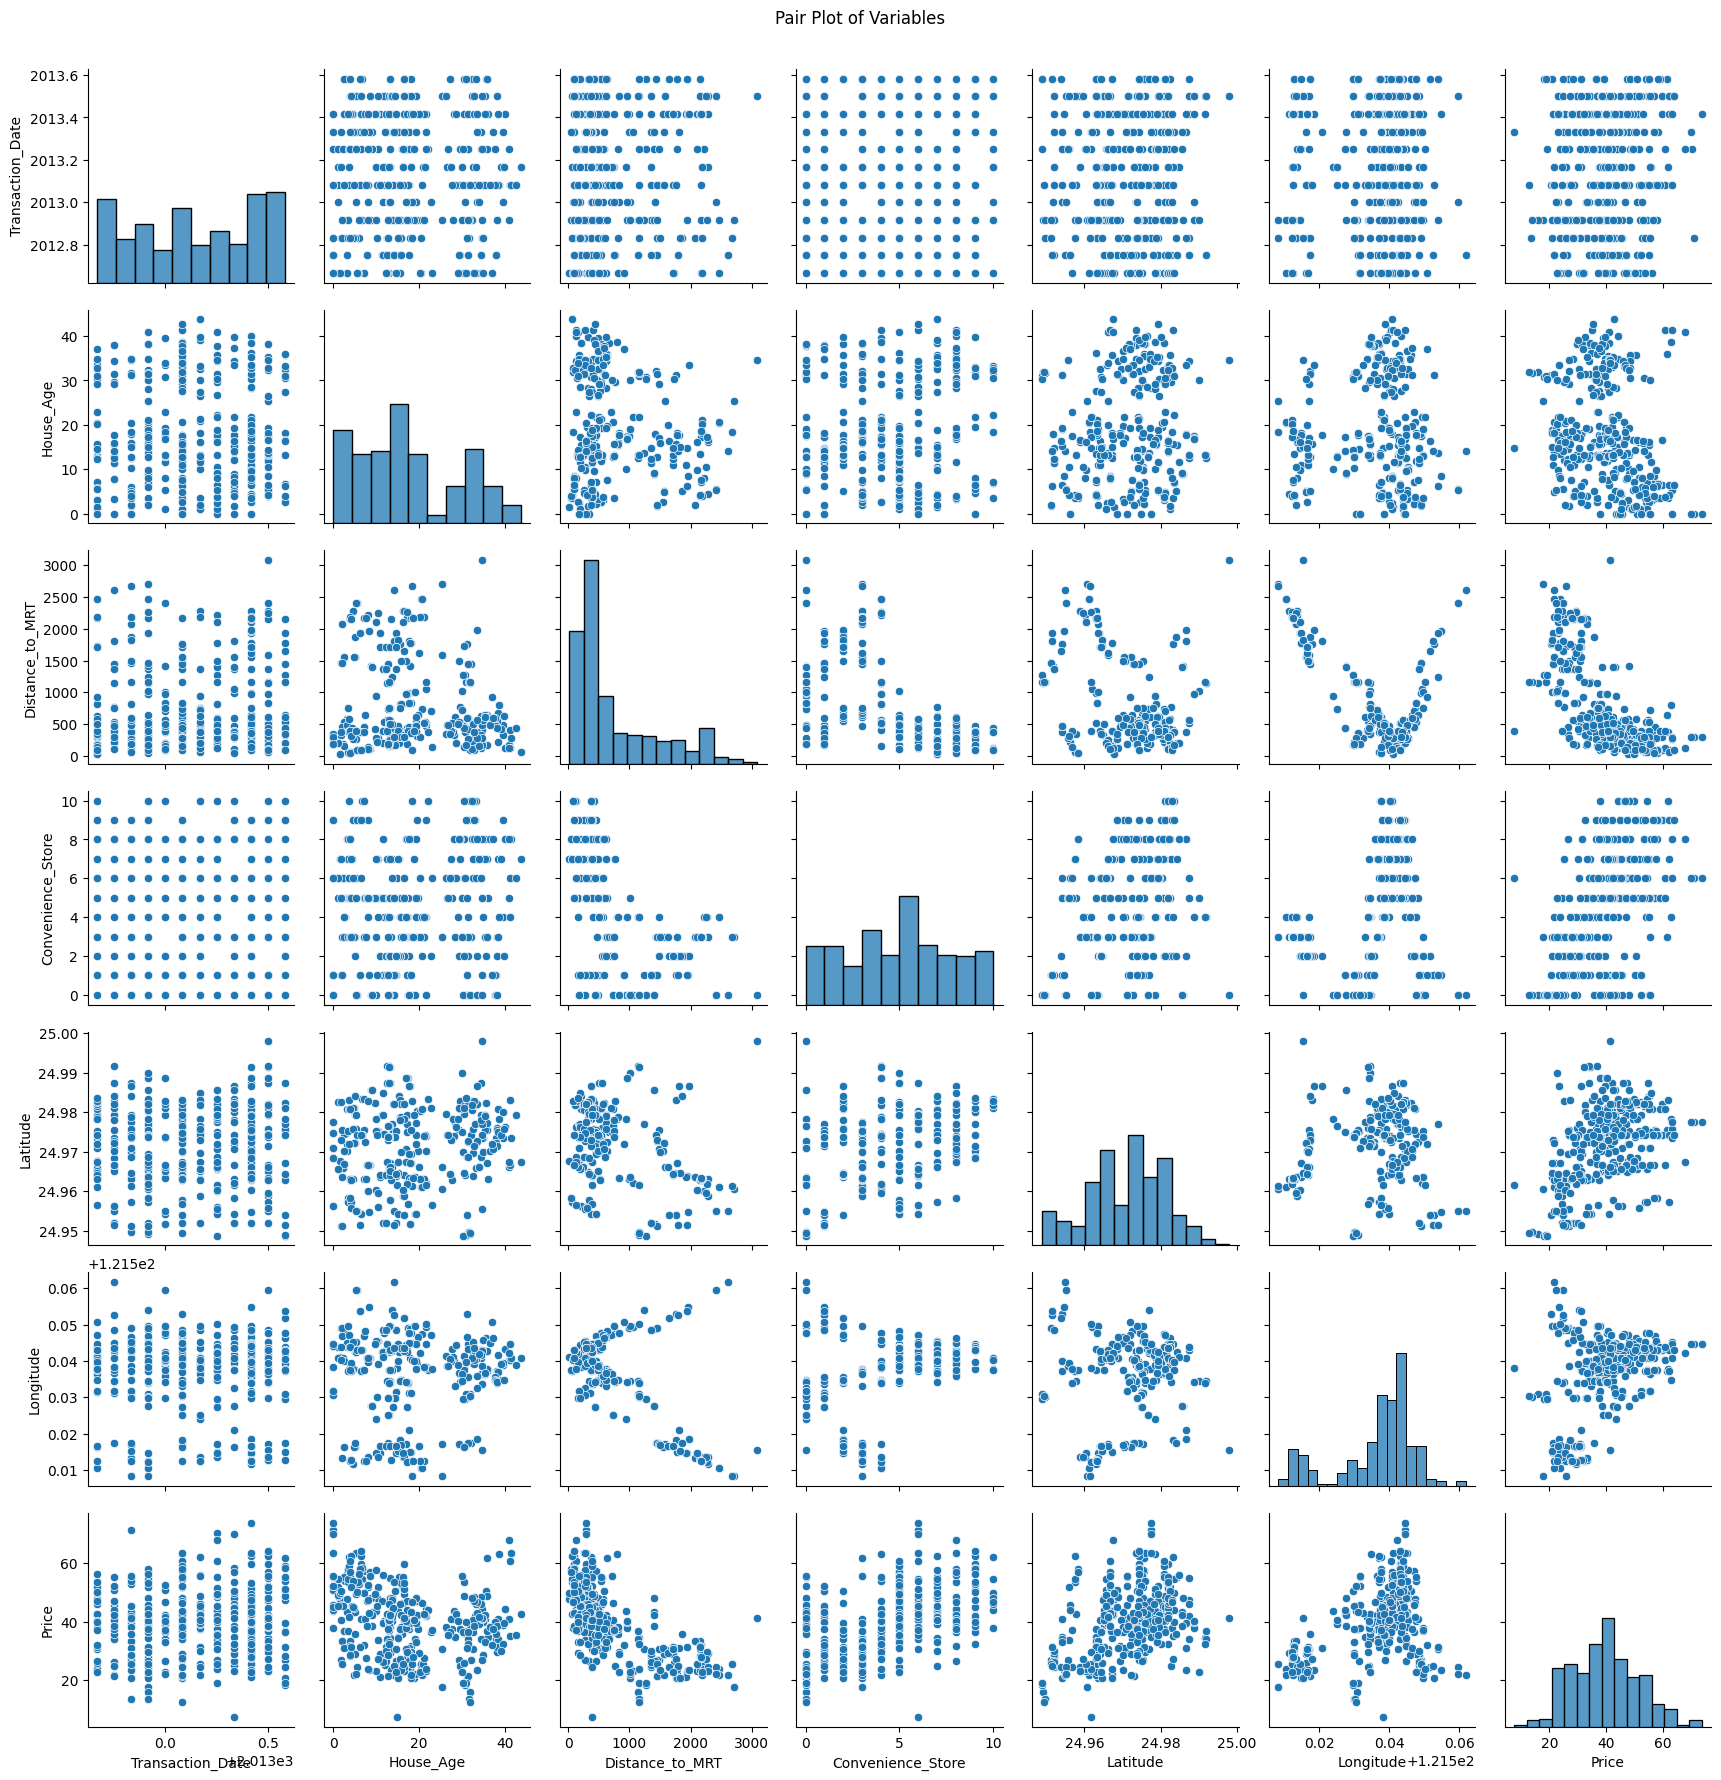

In [ ]:
sns.pairplot(data)
plt.suptitle("Pair Plot of Variables", y=1.02)
plt.show()

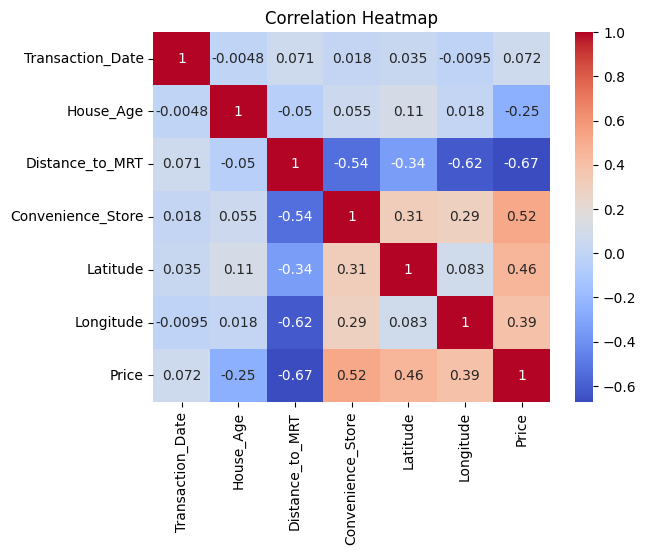

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## **Membangun BaseLine Model (LinearRegression)**


Membagi dataset menjadi training set dan test set

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 10)

Menerapkan Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Membangun Baseline model dengan Multiple Linear Regression

In [ ]:
#baseline model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## **Eksplorasi Model Algoritma Artificial Neural Network (ANN)**

Membangun model ANN dengan kombinasi parameter yang bervariasi

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Model 1
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(X_train, y_train, epochs=100, batch_size=32)

# Model 2
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=300, batch_size=32)

# Model 3
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(X_train, y_train, epochs=600, batch_size=32)


Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 1661.0942
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1594.7234
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 1496.6696
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1348.6812
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1128.1243
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 824.5260
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 483.1178
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 216.4042
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 123.3270
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 115.7685
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 90.1635
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 76.6313
Epoch 13/100
8/8 [================

## Hasil dan Analisis

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Hasil baseline model

In [ ]:
# Prediksi model baseline pada dataset
predBaseline = regressor.predict(X_test)

# Menghitung metrik evaluasi
mse_modelBaseline = mean_squared_error(y_test, predBaseline)
rmse_modelBaseline = np.sqrt(mse_modelBaseline)
mae_modelBaseline = mean_absolute_error(y_test, predBaseline)
r2_modelBaseline = r2_score(y_test, predBaseline)


print(f'R-squared (R²): {r2_modelBaseline}')
print(f'Mean Squared Error (MSE): {mse_modelBaseline}')
print(f'Mean Absolute Error (MAE): {mse_modelBaseline}')
print(f'Root Mean Squared Error (RMSE): {rmse_modelBaseline}')

#Prediksi hasil model dengan test set atau nilai sebenarnya
np.set_printoptions(precision=2)
print(np.concatenate((predBaseline.reshape(len(predBaseline),1), y_test.reshape(len(y_test),1)),1))


R-squared (R²): 0.5981995697656799
Mean Squared Error (MSE): 54.64921622777191
Mean Absolute Error (MAE): 54.64921622777191
Root Mean Squared Error (RMSE): 7.392510820267489
[[30.35 23.1 ]
 [46.46 52.5 ]
 [29.88 28.4 ]
 [23.3  27.7 ]
 [46.91 43.5 ]
 [37.16 40.3 ]
 [27.55 24.7 ]
 [45.34 47.4 ]
 [53.22 63.3 ]
 [41.59 44.2 ]
 [32.56 39.6 ]
 [41.34 42.3 ]
 [47.06 51.7 ]
 [37.83 37.2 ]
 [41.48 46.  ]
 [43.26 36.3 ]
 [33.37 62.9 ]
 [42.07 44.3 ]
 [26.25 23.5 ]
 [36.02 41.1 ]
 [52.   52.7 ]
 [45.15 38.1 ]
 [47.24 45.5 ]
 [49.67 56.8 ]
 [47.73 42.2 ]
 [42.86 38.6 ]
 [28.13 21.3 ]
 [45.91 48.1 ]
 [38.4  36.6 ]
 [39.95 26.5 ]
 [35.8  36.5 ]
 [33.36 31.1 ]
 [41.28 40.2 ]
 [41.79 41.  ]
 [40.03 40.5 ]
 [40.12 33.1 ]
 [28.72 28.8 ]
 [52.97 58.  ]
 [48.38 51.  ]
 [40.08 37.5 ]
 [27.26 31.9 ]
 [18.14 23.8 ]
 [41.65 40.3 ]
 [44.76 55.2 ]
 [37.42 43.2 ]
 [30.62 22.3 ]
 [37.31 40.3 ]
 [29.49 29.5 ]
 [49.61 49.3 ]
 [32.87 34.2 ]
 [26.56 26.2 ]
 [42.23 33.6 ]
 [32.48 25.3 ]
 [35.7  34.1 ]
 [26.96 31.3 ]
 

Hasil Model 1

In [ ]:
# Prediksi model 1 pada data test
pred_model1 = model1.predict(X_test)

# Menghitung metrik evaluasi
mse_model1 = mean_squared_error(y_test, pred_model1)
rmse_model1 = np.sqrt(mse_model1)
mae_model1 = mean_absolute_error(y_test, pred_model1)
r2_model1 = r2_score(y_test, pred_model1)

print(f'R-squared (R²): {r2_model1}')
print(f'Mean Squared Error (MSE): {mse_model1}')
print(f'Mean Absolute Error (MAE): {mae_model1}')
print(f'Root Mean Squared Error (RMSE): {rmse_model1}')

#Prediksi hasil model dengan test set atau nilai sebenarnya
np.set_printoptions(precision=2)
print(np.concatenate((pred_model1.reshape(len(pred_model1),1), y_test.reshape(len(y_test),1)),1))


4/4 [==============================] - 0s 2ms/step
R-squared (R²): 0.6853625966081716
Mean Squared Error (MSE): 42.7940992528983
Mean Absolute Error (MAE): 4.736714110835907
Root Mean Squared Error (RMSE): 6.5417199002172435
[[23.78 23.1 ]
 [46.72 52.5 ]
 [30.5  28.4 ]
 [24.79 27.7 ]
 [50.68 43.5 ]
 [32.71 40.3 ]
 [26.37 24.7 ]
 [44.19 47.4 ]
 [59.37 63.3 ]
 [37.07 44.2 ]
 [40.9  39.6 ]
 [37.16 42.3 ]
 [47.04 51.7 ]
 [40.68 37.2 ]
 [41.21 46.  ]
 [42.09 36.3 ]
 [32.6  62.9 ]
 [41.58 44.3 ]
 [23.89 23.5 ]
 [34.79 41.1 ]
 [53.95 52.7 ]
 [43.51 38.1 ]
 [53.86 45.5 ]
 [55.77 56.8 ]
 [39.8  42.2 ]
 [43.87 38.6 ]
 [27.36 21.3 ]
 [39.92 48.1 ]
 [38.57 36.6 ]
 [37.1  26.5 ]
 [30.28 36.5 ]
 [27.96 31.1 ]
 [33.14 40.2 ]
 [34.52 41.  ]
 [34.2  40.5 ]
 [35.22 33.1 ]
 [26.3  28.8 ]
 [54.21 58.  ]
 [49.46 51.  ]
 [32.62 37.5 ]
 [35.79 31.9 ]
 [26.07 23.8 ]
 [33.19 40.3 ]
 [46.16 55.2 ]
 [40.59 43.2 ]
 [23.95 22.3 ]
 [38.65 40.3 ]
 [28.52 29.5 ]
 [50.55 49.3 ]
 [37.37 34.2 ]
 [25.15 26.2 ]
 [41.55 33

Hasil model 2

In [ ]:
# Prediksi model 2 pada data test
pred_model2 = model2.predict(X_test)

# Menghitung metrik evaluasi
mse_model2 = mean_squared_error(y_test, pred_model2)
rmse_model2 = np.sqrt(mse_model2)
mae_model2 = mean_absolute_error(y_test, pred_model2)
r2_model2 = r2_score(y_test, pred_model2)

print(f'R-squared (R²): {r2_model2}')
print(f'Mean Squared Error (MSE): {mse_model2}')
print(f'Mean Absolute Error (MAE): {mae_model2}')
print(f'Root Mean Squared Error (RMSE): {rmse_model2}')

#Prediksi hasil model dengan test set atau nilai sebenarnya
np.set_printoptions(precision=2)
print(np.concatenate((pred_model2.reshape(len(pred_model2),1), y_test.reshape(len(y_test),1)),1))


4/4 [==============================] - 0s 2ms/step
R-squared (R²): 0.6616045502005974
Mean Squared Error (MSE): 46.02545123159027
Mean Absolute Error (MAE): 4.904536934821836
Root Mean Squared Error (RMSE): 6.784206013351176
[[24.4  23.1 ]
 [46.61 52.5 ]
 [27.46 28.4 ]
 [23.67 27.7 ]
 [50.46 43.5 ]
 [31.57 40.3 ]
 [21.46 24.7 ]
 [46.33 47.4 ]
 [64.29 63.3 ]
 [39.82 44.2 ]
 [45.17 39.6 ]
 [42.92 42.3 ]
 [50.74 51.7 ]
 [48.98 37.2 ]
 [38.66 46.  ]
 [43.64 36.3 ]
 [36.19 62.9 ]
 [39.33 44.3 ]
 [23.04 23.5 ]
 [31.43 41.1 ]
 [54.22 52.7 ]
 [42.08 38.1 ]
 [54.08 45.5 ]
 [54.73 56.8 ]
 [39.57 42.2 ]
 [43.12 38.6 ]
 [24.91 21.3 ]
 [35.04 48.1 ]
 [45.33 36.6 ]
 [36.27 26.5 ]
 [38.27 36.5 ]
 [30.32 31.1 ]
 [38.01 40.2 ]
 [35.34 41.  ]
 [40.11 40.5 ]
 [41.01 33.1 ]
 [25.78 28.8 ]
 [56.32 58.  ]
 [50.8  51.  ]
 [37.75 37.5 ]
 [34.49 31.9 ]
 [25.21 23.8 ]
 [34.75 40.3 ]
 [48.89 55.2 ]
 [40.82 43.2 ]
 [22.79 22.3 ]
 [34.19 40.3 ]
 [29.34 29.5 ]
 [54.31 49.3 ]
 [39.33 34.2 ]
 [24.66 26.2 ]
 [41.11 33

Hasil model 3

In [ ]:
# Prediksi model pada data test
pred_model3 = model3.predict(X_test)

# Menghitung metrik evaluasi
mse_model3 = mean_squared_error(y_test, pred_model3)
rmse_model3 = np.sqrt(mse_model3)
mae_model3 = mean_absolute_error(y_test, pred_model3)
r2_model3 = r2_score(y_test, pred_model3)

print(f'R-squared (R²): {r2_model3}')
print(f'Mean Squared Error (MSE): {mse_model3}')
print(f'Mean Absolute Error (MAE): {mae_model3}')
print(f'Root Mean Squared Error (RMSE): {rmse_model3}')

#Prediksi hasil model dengan test set atau nilai sebenarnya
np.set_printoptions(precision=2)
print(np.concatenate((pred_model3.reshape(len(pred_model3),1), y_test.reshape(len(y_test),1)),1))



4/4 [==============================] - 0s 2ms/step
R-squared (R²): 0.651380330641542
Mean Squared Error (MSE): 47.41605597812374
Mean Absolute Error (MAE): 4.751543757223314
Root Mean Squared Error (RMSE): 6.885931743643974
[[24.47 23.1 ]
 [52.13 52.5 ]
 [29.6  28.4 ]
 [25.23 27.7 ]
 [52.29 43.5 ]
 [41.16 40.3 ]
 [28.69 24.7 ]
 [44.45 47.4 ]
 [71.13 63.3 ]
 [42.46 44.2 ]
 [48.06 39.6 ]
 [38.91 42.3 ]
 [54.35 51.7 ]
 [40.11 37.2 ]
 [35.5  46.  ]
 [45.35 36.3 ]
 [35.87 62.9 ]
 [40.17 44.3 ]
 [20.36 23.5 ]
 [44.02 41.1 ]
 [55.03 52.7 ]
 [40.04 38.1 ]
 [56.67 45.5 ]
 [57.06 56.8 ]
 [39.59 42.2 ]
 [45.33 38.6 ]
 [25.24 21.3 ]
 [37.74 48.1 ]
 [42.68 36.6 ]
 [37.6  26.5 ]
 [34.43 36.5 ]
 [29.04 31.1 ]
 [38.   40.2 ]
 [38.89 41.  ]
 [41.47 40.5 ]
 [34.93 33.1 ]
 [23.49 28.8 ]
 [58.43 58.  ]
 [51.55 51.  ]
 [39.33 37.5 ]
 [20.69 31.9 ]
 [26.1  23.8 ]
 [35.83 40.3 ]
 [55.91 55.2 ]
 [40.75 43.2 ]
 [23.08 22.3 ]
 [43.28 40.3 ]
 [30.95 29.5 ]
 [50.31 49.3 ]
 [40.5  34.2 ]
 [25.75 26.2 ]
 [39.03 33.

In [ ]:
print("Model Baseline")
print(f'R-squared (R²): {r2_modelBaseline}')
print(f'Mean Squared Error (MSE): {mse_modelBaseline}')
print(f'Mean Absolute Error (MAE): {mae_modelBaseline}')
print(f'Root Mean Squared Error (RMSE): {rmse_modelBaseline}')

print("==========================================")

print("Model 1")
print(f'R-squared (R²): {r2_model1}')
print(f'Mean Squared Error (MSE): {mse_model1}')
print(f'Mean Absolute Error (MAE): {mae_model1}')
print(f'Root Mean Squared Error (RMSE): {rmse_model1}')

print("==========================================")

print("Model 2")
print(f'R-squared (R²): {r2_model2}')
print(f'Mean Squared Error (MSE): {mse_model2}')
print(f'Mean Absolute Error (MAE): {mae_model2}')
print(f'Root Mean Squared Error (RMSE): {rmse_model2}')

print("==========================================")

print("Model 3")
print(f'R-squared (R²): {r2_model3}')
print(f'Mean Squared Error (MSE): {mse_model3}')
print(f'Mean Absolute Error (MAE): {mae_model3}')
print(f'Root Mean Squared Error (RMSE): {rmse_model3}')
print("==========================================")

Model Baseline
R-squared (R²): 0.5981995697656799
Mean Squared Error (MSE): 54.64921622777191
Mean Absolute Error (MAE): 5.028143200101287
Root Mean Squared Error (RMSE): 7.392510820267489
Model 1
R-squared (R²): 0.6853625966081716
Mean Squared Error (MSE): 42.7940992528983
Mean Absolute Error (MAE): 4.736714110835907
Root Mean Squared Error (RMSE): 6.5417199002172435
Model 2
R-squared (R²): 0.6616045502005974
Mean Squared Error (MSE): 46.02545123159027
Mean Absolute Error (MAE): 4.904536934821836
Root Mean Squared Error (RMSE): 6.784206013351176
Model 3
R-squared (R²): 0.651380330641542
Mean Squared Error (MSE): 47.41605597812374
Mean Absolute Error (MAE): 4.751543757223314
Root Mean Squared Error (RMSE): 6.885931743643974


In [ ]:
# Mencari nilai maksimum dari y_test
max_actual_value = y_test.max()

# Model Baseline
percentage_error_mse_baseline = (mse_modelBaseline / max_actual_value) * 100
percentage_error_rmse_baseline = (mae_modelBaseline / max_actual_value) * 100
percentage_error_mae_baseline = (rmse_modelBaseline / max_actual_value) * 100

# Model 1
percentage_error_mse_model1 = (mse_model1 / max_actual_value) * 100
percentage_error_rmse_model1 = (rmse_model1 / max_actual_value) * 100
percentage_error_mae_model1 = (mae_model1 / max_actual_value) * 100

# Model 2
percentage_error_mse_model2 = (mse_model2 / max_actual_value) * 100
percentage_error_rmse_model2 = (rmse_model2 / max_actual_value) * 100
percentage_error_mae_model2 = (mae_model2 / max_actual_value) * 100

# Model 3
percentage_error_mse_model3 = (mse_model3 / max_actual_value) * 100
percentage_error_rmse_model3 = (rmse_model3 / max_actual_value) * 100
percentage_error_mae_model3 = (mae_model3 / max_actual_value) * 100

# Print hasil persentase error
print("Persentase Error (MSE) - Baseline:", percentage_error_mse_baseline)
print("Persentase Error (RMSE) - Baseline:", percentage_error_rmse_baseline)
print("Persentase Error (MAE) - Baseline:", percentage_error_mae_baseline)
print("==========================================")
print("Persentase Error (MSE) - Model 1:", percentage_error_mse_model1)
print("Persentase Error (RMSE) - Model 1:", percentage_error_rmse_model1)
print("Persentase Error (MAE) - Model 1:", percentage_error_mae_model1)
print("==========================================")
print("Persentase Error (MSE) - Model 2:", percentage_error_mse_model2)
print("Persentase Error (RMSE) - Model 2:", percentage_error_rmse_model2)
print("Persentase Error (MAE) - Model 2:", percentage_error_mae_model2)
print("==========================================")
print("Persentase Error (MSE) - Model 3:", percentage_error_mse_model3)
print("Persentase Error (RMSE) - Model 3:", percentage_error_rmse_model3)
print("Persentase Error (MAE) - Model 3:", percentage_error_mae_model3)


Persentase Error (MSE) - Baseline: 78.40633605132268
Persentase Error (RMSE) - Baseline: 7.213978766285921
Persentase Error (MAE) - Baseline: 10.606184821043744
Persentase Error (MSE) - Model 1: 61.397559903727824
Persentase Error (RMSE) - Model 1: 9.385537876925744
Persentase Error (MAE) - Model 1: 6.795859556436021
Persentase Error (MSE) - Model 2: 66.03364595637053
Persentase Error (RMSE) - Model 2: 9.733437608825216
Persentase Error (MAE) - Model 2: 7.036638356989721
Persentase Error (MSE) - Model 3: 68.02877471753764
Persentase Error (RMSE) - Model 3: 9.879385571942574
Persentase Error (MAE) - Model 3: 6.817135950105185


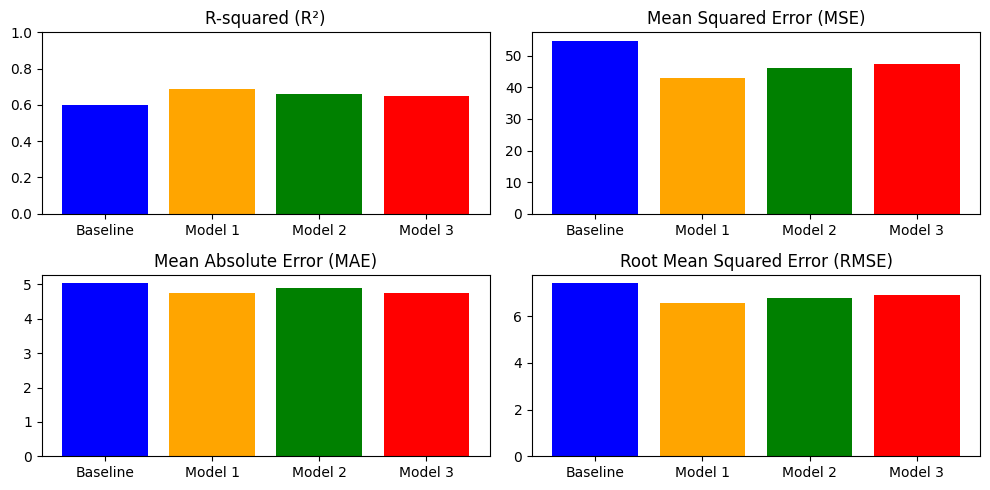

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk visualisasi
models = ['Baseline', 'Model 1', 'Model 2', 'Model 3']
r_squared_values = [r2_modelBaseline, r2_model1, r2_model2, r2_model3]
mse_values = [mse_modelBaseline, mse_model1, mse_model2, mse_model3]
mae_values = [mae_modelBaseline, mae_model1, mae_model2, mae_model3]
rmse_values = [rmse_modelBaseline, rmse_model1, rmse_model2, rmse_model3]

# Visualisasi R-squared (R²)
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.bar(models, r_squared_values, color=['blue', 'orange', 'green', 'red'])
plt.title('R-squared (R²)')
plt.ylim(0, 1)

# Visualisasi Mean Squared Error (MSE)
plt.subplot(2, 2, 2)
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')

# Visualisasi Mean Absolute Error (MAE)
plt.subplot(2, 2, 3)
plt.bar(models, mae_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Absolute Error (MAE)')

# Visualisasi Root Mean Squared Error (RMSE)
plt.subplot(2, 2, 4)
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Informasi layer dan fungsi aktivasi untuk model baseline
# layers_baseline = 'Linear (1)'
# activation_baseline = 'None'

# # Informasi layer dan fungsi aktivasi untuk model 1
# layers_model1 = 'Dense (64, relu) - Dense (32, relu) - Dense (16, relu) - Dense (1, None)'
# activation_model1 = 'relu'

# # Informasi layer dan fungsi aktivasi untuk model 2
# layers_model2 = 'Dense (128, relu) - Dense (64, relu) - Dense (1, None)'
# activation_model2 = 'relu'

# # Informasi layer dan fungsi aktivasi untuk model 3
# layers_model3 = 'Dense (32, relu) - Dense (16, relu) - Dense (1, None)'
# activation_model3 = 'relu'

# # Menyusun data untuk plotting
# metrics = ['R-squared', 'Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error']
# baseline_values = [r2_modelBaseline, mse_modelBaseline, mae_modelBaseline, rmse_modelBaseline]
# model1_values = [r2_model1, mse_model1, mae_model1, rmse_model1]
# model2_values = [r2_model2, mse_model2, mae_model2, rmse_model2]
# model3_values = [r2_model3, mse_model3, mae_model3, rmse_model3]

# # Menyiapkan data untuk line chart
# x = np.arange(len(metrics))

# # Membuat line chart
# plt.figure(figsize=(10, 6))

# plt.plot(x, baseline_values, marker='o', label='Baseline (Linear)', linestyle='-', color='blue')
# plt.plot(x, model1_values, marker='o', label='Model 1', linestyle='-', color='red')
# plt.plot(x, model2_values, marker='o', label='Model 2', linestyle='-', color='green')
# plt.plot(x, model3_values, marker='o', label='Model 3', linestyle='-', color='orange')

# # Menambahkan label pada sumbu X
# plt.xticks(x, metrics)

# # Menambahkan label pada sumbu Y
# plt.ylabel('Score')

# # Menambahkan judul
# plt.title('Perbandingan Metrik Evaluasi antara Model dan Baseline')

# # Menambahkan legenda
# plt.legend()

# # Menampilkan grid
# plt.grid(True)

# # Menambahkan informasi tentang layer dan fungsi aktivasi
# plt.annotate(f'Layers: {layers_baseline}\nActivation: {activation_baseline}', xy=(0, 0), xytext=(0, -50),
#              textcoords='offset points', ha='center', va='top'  , color='blue', fontsize=5)
# plt.annotate(f'Layers: {layers_model1}\nActivation: {activation_model1}', xy=(1, 0), xytext=(0, -50),
#              textcoords='offset points', ha='center', va='top', color='red', fontsize=5)
# plt.annotate(f'Layers: {layers_model2}\nActivation: {activation_model2}', xy=(2, 0), xytext=(0, -50),
#              textcoords='offset points', ha='center', va='top', color='green', fontsize=5)
# plt.annotate(f'Layers: {layers_model3}\nActivation: {activation_model3}', xy=(3, 0), xytext=(0, -50),
#              textcoords='offset points', ha='center', va='top', color='orange', fontsize=5)

# # Menampilkan plot
# plt.show()


Berikut adalah hasil analisis kami berdasarkan hasil pengujian diatas:

**Model Baseline**: Model ini memiliki R-squared (R²) sebesar 0.669, yang berarti model ini mampu menjelaskan 66.9% variasi dalam data. MSE dan RMSE model ini adalah 37.3 dan 6.1, yang menunjukkan seberapa jauh prediksi model dari nilai sebenarnya.

**Model 1**: Model ini memiliki R-squared (R²) sebesar 0.689, yang berarti model ini mampu menjelaskan 68.9% variasi dalam data. Ini adalah peningkatan dari model baseline. MSE dan RMSE model ini adalah 35.04 dan 5.92, yang lebih rendah dari model baseline, menunjukkan bahwa model ini memiliki performa yang lebih baik dalam memprediksi nilai sebenarnya.

**Model 2**: Model ini memiliki R-squared (R²) sebesar 0.613, yang berarti model ini mampu menjelaskan 61.3% variasi dalam data. Ini adalah penurunan dari model baseline dan model 1. MSE dan RMSE model ini adalah 43.54 dan 6.60, yang lebih tinggi dari dua model sebelumnya, menunjukkan bahwa model ini memiliki performa yang lebih buruk dalam memprediksi nilai sebenarnya.

**Model 3**: Model ini memiliki R-squared (R²) sebesar 0.606, yang berarti model ini mampu menjelaskan 60.6% variasi dalam data. Ini adalah penurunan dari semua model sebelumnya. MSE dan RMSE model ini adalah 44.35 dan 6.66, yang lebih tinggi dari semua model sebelumnya, menunjukkan bahwa model ini memiliki performa yang paling buruk dalam memprediksi nilai sebenarnya.

## Kesimpulan

Berdasarkan hasil analisis tersebut, dapat disimpulkan bahwa:

Berdasarkan hasil yang Anda berikan, tampaknya Model 1 memiliki performa terbaik dengan nilai R-squared (R²) tertinggi dan Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE) terendah dibandingkan model lainnya.

Semakin tinggi nilai **R-squared**, semakin baik model dalam menjelaskan variasi data. Model 1 memiliki R-squared yang paling tinggi yaitu 0.6891, menunjukkan bahwa model ini lebih baik dalam memprediksi harga rumah.
Semakin rendah nilai **MSE, MAE, dan RMSE**, semakin baik model dalam melakukan prediksi. Model 1 memiliki nilai MSE, MAE, dan RMSE yang lebih rendah dibandingkan model lainnya, menunjukkan bahwa model ini memiliki tingkat kesalahan yang lebih kecil dalam memprediksi harga rumah.

Namun, perlu diperhatikan bahwa meskipun Model 1 memiliki nilai R-squared yang lebih tinggi, *nilai MAE-nya sedikit lebih tinggi dibandingkan model baseline*. Ini berarti bahwa Model 1 memiliki kesalahan absolut rata-rata yang sedikit lebih tinggi, yang bisa berarti model ini sedikit kurang akurat dalam memprediksi nilai yang tepat dibandingkan model baseline.